In [1]:
using QuantumOptics
using PyPlot
using LaTeXStrings
using Random
using DelimitedFiles
using NPZ, Printf
using LinearAlgebra
using DifferentialEquations
using SpecialFunctions
using SparseArrays
using StatsBase

┌ Warning: Error requiring `KrylovKit` from `LinearSolve`
│   exception = (LoadError("/Users/henryhunt/.julia/packages/LinearSolve/qCLK7/ext/LinearSolveKrylovKitExt.jl", 1, ArgumentError("Package LinearSolve does not have KrylovKit in its dependencies:\n- You may have a partially installed environment. Try `Pkg.instantiate()`\n  to ensure all packages in the environment are installed.\n- Or, if you have LinearSolve checked out for development and have\n  added KrylovKit as a dependency but haven't updated your primary\n  environment's manifest file, try `Pkg.resolve()`.\n- Otherwise you may need to report an issue with LinearSolve")), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00000001066f066b, Ptr{Nothing} @0x00000001066f0837, Ptr{Nothing} @0x0000000104f24893, Ptr{Nothing} @0x0000000104f5a4db, Ptr{Nothing} @0x0000000104f592e7, Ptr{Nothing} @0x0000000104f59663, Ptr{Nothing} @0x0000000104f59c43, Ptr{Nothing} @0x0000000104f5a9d7, Ptr{Nothing} @0x000000011ba1c883, Ptr{Nothing

In [10]:
fockmax = 10
b = FockBasis(fockmax)
a = destroy(b)

κ = 0.01
Δc = 10.
dt=0.01
tspan = dt*collect(1:2000)

C = 2*sqrt(κ)*a
H0 = Δc*dagger(a)*a

ψ0 = coherentstate(b,0.3);

In [86]:
θ = 0.5π
Hs = 1.0im*C*exp(-1.0im*θ)
Y = C*exp(-1.0im*θ) + dagger(C)*exp(1.0im*θ)
CdagC = -0.5im*dagger(C)*C
H_nl(ψ) = expect(Y, normalize(ψ))*Hs + CdagC

fdet_homodyne(t, ψ) = H0 + H_nl(ψ)
fst_homodyne(t, ψ) = [Hs]
tout, psi_t = stochastic.schroedinger_dynamic(tspan, ψ0, fdet_homodyne, fst_homodyne; dt=dt, normalize_state=true);

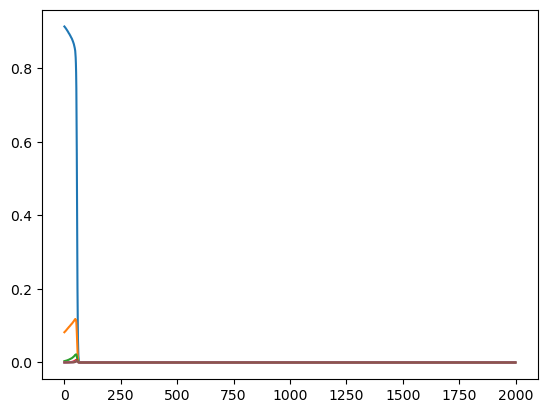

In [87]:
plot(expect(projector(basisstate(b, 1)), psi_t))
plot(expect(projector(basisstate(b, 2)), psi_t))
plot(expect(projector(basisstate(b, 3)), psi_t))
plot(expect(projector(basisstate(b, 4)), psi_t))
plot(expect(projector(basisstate(b, 5)), psi_t))
plot(expect(projector(basisstate(b, 6)), psi_t))
PyPlot.display_figs()